In [15]:
import numpy as np

import matplotlib.pyplot as plt

In [16]:
data = {
    'cores': [4, 8, 16, 16, 32, 32, 64, 128, 256],
    'nodes': [1, 1, 1, 2, 1, 2, 2, 4, 8],
    'runtime': [1412, 774, 623, 603, 346, 310, 175, 90, 51],
    'cputime': [1.4042100000000000e+03, 8.2171000000000004e+02, 6.1801999999999998e+02, 5.9261000000000001e+02, 3.4005000000000001e+02, 3.0557999999999998e+02, 1.6906000000000000e+02, 8.3390000000000001e+01, 4.5130000000000003e+01]
}
print(data)

{'cores': [4, 8, 16, 16, 32, 32, 64, 128, 256], 'nodes': [1, 1, 1, 2, 1, 2, 2, 4, 8], 'runtime': [1412, 774, 623, 603, 346, 310, 175, 90, 51], 'cputime': [1404.21, 821.71, 618.02, 592.61, 340.05, 305.58, 169.06, 83.39, 45.13]}


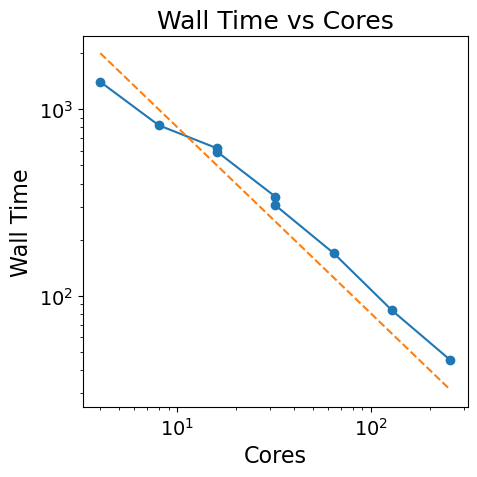

In [17]:
# Plot scaling plots
plt.figure(figsize=(5, 5))


plt.plot(data['cores'], data['cputime'], marker='o')

plt.plot(data['cores'], 8000*(np.array(data['cores'],dtype=float))**(-1),'--',label='1/N')
plt.xlabel('Cores')
plt.ylabel('Wall Time')
plt.title('Wall Time vs Cores')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

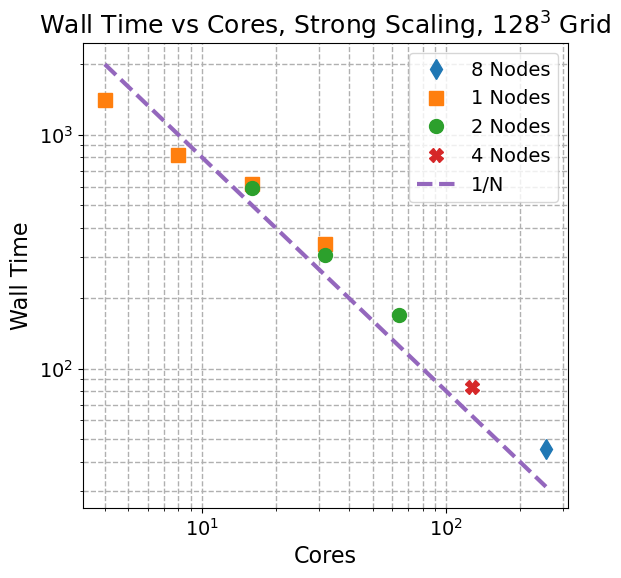

In [18]:
# Plot scaling plots
plt.figure(figsize=(6, 6))

# Set font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

markers = {1: 's',2: 'o', 4: 'X',8: 'd'}
for node in set(data['nodes']):
    node_indices = [i for i, n in enumerate(data['nodes']) if n == node]
    plt.plot(np.array(data['cores'])[node_indices], np.array(data['cputime'])[node_indices], marker=markers[node], linestyle='', label=f'{node} Nodes', lw=3, markersize=10)

plt.plot(data['cores'], 8000*(np.array(data['cores'],dtype=float))**(-1),'--',label='1/N',lw=3)
plt.xlabel('Cores')
plt.ylabel('Wall Time')
plt.title(r'Wall Time vs Cores, Strong Scaling, $128^3$ Grid')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--", lw=1)
plt.tight_layout()
plt.show()


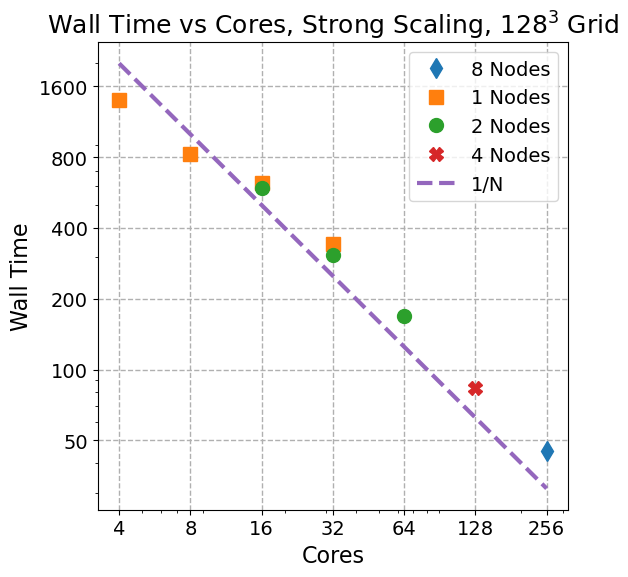

In [21]:
import matplotlib.ticker as ticker

# Plot scaling plots
plt.figure(figsize=(6, 6))

# Set font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# markers = {1: 'o', 2: 'X'}
for node in set(data['nodes']):
    node_indices = [i for i, n in enumerate(data['nodes']) if n == node]
    plt.plot(
        np.array(data['cores'])[node_indices],
        np.array(data['cputime'])[node_indices],
        marker=markers[node],
        linestyle='',
        label=f'{node} Nodes',
        lw=3,
        markersize=10
    )

plt.plot(data['cores'], 8000 * (np.array(data['cores'], dtype=float))**(-1), '--', label='1/N', lw=3)
plt.xlabel('Cores')
plt.ylabel('Wall Time')
plt.title(r'Wall Time vs Cores, Strong Scaling, $128^3$ Grid')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True, which="major", ls="--", lw=1)

# Add more xtick and ytick labels
xticks = [4, 8, 16, 32, 64, 128, 256]
yticks = [50, 100, 200, 400, 800, 1600]
plt.xticks(xticks)
plt.yticks(yticks)

# Use ScalarFormatter for plain tick labels
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.tick_params(axis='x', which='both', labelsize=14)
ax.tick_params(axis='y', which='both', labelsize=14)

plt.tight_layout()
plt.show()
